# Flo Graph

## 필요 라이브러리 로드

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math

In [249]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [250]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [301]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time
from datetime import datetime

## 파일 불러오기

In [ ]:
site_name = 'flo'

In [ ]:
# 기간 설정
start_date = '2022-04-18'
end_date = '2022-04-23'

In [473]:
code_path = 'c:/data/Wantreez/Crawling/music'
code_path

'c:/data/Wantreez/Crawling/music'

In [252]:
# 실시간 순위 파일 폴더로 이동
live_folder = f'/crawled_data/live_{site_name}/'
try:
    os.chdir(code_path + live_folder)
except:
    pass

In [253]:
file_list = os.listdir()
for i, s in enumerate(file_list):
    print(i, s)

0 live_flo_20220405.xlsx
1 live_flo_20220406.xlsx
2 live_flo_20220407.xlsx
3 live_flo_20220412.xlsx
4 live_flo_20220413.xlsx
5 live_flo_20220414_110035.xlsx
6 live_flo_20220415_110026.xlsx
7 live_flo_20220418_110024.xlsx
8 live_flo_20220419_110028.xlsx
9 live_flo_20220420_110013.xlsx
10 live_flo_20220421_110051.xlsx
11 live_flo_20220422_110026.xlsx
12 live_flo_20220423_110023.xlsx
13 live_flo_20220425_110022.xlsx
14 live_flo_20220426_110029.xlsx
15 live_flo_20220427_110027.xlsx
16 live_flo_20220428_110009.xlsx
17 live_flo_20220429_110008.xlsx
18 live_flo_20220430_110005.xlsx
19 live_flo_20220501_110005.xlsx
20 live_flo_20220502_110110.xlsx
21 live_flo_20220502_154533.xlsx
22 live_flo_20220503_110005.xlsx


## 수집한 파일 모두 합치기

In [255]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-05,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
1,2022-04-05,2,TOMBOY,(여자)아이들,I NEVER DIE
2,2022-04-05,3,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
3,2022-04-05,4,사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙)
4,2022-04-05,5,GANADARA (Feat. 아이유),박재범,GANADARA


In [256]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-18,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
1,2022-04-18,2,LOVE DIVE,IVE (아이브),LOVE DIVE
2,2022-04-18,3,TOMBOY,(여자)아이들,I NEVER DIE
3,2022-04-18,4,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
4,2022-04-18,5,사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙)


In [257]:
sliced_df.tail()

,날짜,순위,곡,가수,앨범
595,2022-04-23,96,밝게 빛나는 별이 되어 비춰줄게,송이한,밝게 빛나는 별이 되어 비춰줄게
596,2022-04-23,97,내가 아니라도,주호,내가 아니라도
597,2022-04-23,98,Can't Control Myself,태연 (TAEYEON),Can't Control Myself
598,2022-04-23,99,마지막 너의 인사,헤이즈 (Heize),우리들의 블루스 OST Part 2
599,2022-04-23,100,My Universe,방탄소년단,My Universe


In [258]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      600 non-null    object
 1   순위      600 non-null    int64 
 2   곡       600 non-null    object
 3   가수      600 non-null    object
 4   앨범      600 non-null    object
dtypes: int64(1), object(4)
memory usage: 23.6+ KB


### 수집한 곡의 유니크

In [259]:
len(sliced_df['곡'].unique())

110

In [260]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

,날짜
0,2022-04-18
1,2022-04-19
2,2022-04-20
3,2022-04-21
4,2022-04-22
5,2022-04-23


### 제목과 가수 매칭 값 추출

In [474]:
sort_df = sliced_df[['곡', '가수']]
sort_df

,곡,가수
0,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
1,LOVE DIVE,IVE (아이브)
2,TOMBOY,(여자)아이들
3,Feel My Rhythm,Red Velvet (레드벨벳)
4,사랑인가 봐,멜로망스
...,...,...
595,밝게 빛나는 별이 되어 비춰줄게,송이한
596,내가 아니라도,주호
597,Can't Control Myself,태연 (TAEYEON)
598,마지막 너의 인사,헤이즈 (Heize)


In [475]:
sort_df = sort_df.drop_duplicates(['곡', '가수'], ignore_index=True)
sort_df

,곡,가수
0,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
1,LOVE DIVE,IVE (아이브)
2,TOMBOY,(여자)아이들
3,Feel My Rhythm,Red Velvet (레드벨벳)
4,사랑인가 봐,멜로망스
...,...,...
105,My Universe,방탄소년단
106,Seoul,볼빨간사춘기
107,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현)
108,Love story,볼빨간사춘기


### 순위변동 열 추가한 df 생성
* 기본 날짜에 데이터 추가
* nan값 중 곡, 가수, 앨범 명은 해당 가수의 정보로 채우기

In [476]:
song_df_list = []
for i in range(sort_df.shape[0]):
    temp = sort_df.iloc[i, :]
    one_df = sliced_df[(sliced_df['곡'] == temp['곡']) & (sliced_df['가수'] == temp['가수'])].reset_index(drop=True)
    one_df['순위변동'] = - ( one_df['순위'] - one_df['순위'].shift(1) )
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    one_df['순위변동'] = one_df['순위변동'].astype('int64')
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    title = merged_df['곡'].value_counts().index[0]
    artist = merged_df['가수'].value_counts().index[0]
    album = merged_df['앨범'].value_counts().index[0]
    merged_df['곡'] = merged_df['곡'].fillna(title)
    merged_df['가수'] = merged_df['가수'].fillna(artist)
    merged_df['앨범'] = merged_df['앨범'].fillna(album)
    song_df_list.append(merged_df)

### 노래 개수

In [477]:
len(song_df_list)

110

## 그래프 테스트

### 노래 선택

In [478]:
song_df_list[16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      6 non-null      object
 1   순위      6 non-null      int64 
 2   곡       6 non-null      object
 3   가수      6 non-null      object
 4   앨범      6 non-null      object
 5   순위변동    6 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 336.0+ bytes


In [479]:
tmp = song_df_list[100]
tmp

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-18,NaN,걷고 싶다,임영웅,사랑의 콜센타 PART39,NaN
1,2022-04-19,79.0,걷고 싶다,임영웅,사랑의 콜센타 PART39,0.0
2,2022-04-20,70.0,걷고 싶다,임영웅,사랑의 콜센타 PART39,9.0
3,2022-04-21,60.0,걷고 싶다,임영웅,사랑의 콜센타 PART39,10.0
4,2022-04-22,54.0,걷고 싶다,임영웅,사랑의 콜센타 PART39,6.0
5,2022-04-23,40.0,걷고 싶다,임영웅,사랑의 콜센타 PART39,14.0


In [480]:
tmp['곡'].value_counts().index.values[0]

'걷고 싶다'

In [481]:
tmp['가수'].value_counts().index.values[0]

'임영웅'

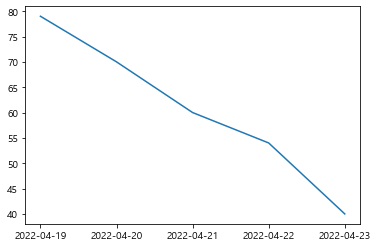

In [482]:
plt.plot(tmp['날짜'], tmp['순위'])

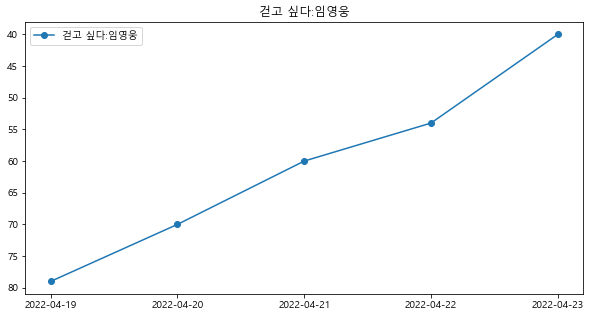

In [483]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist

plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.title(song_label)
plt.legend()
plt.show()

In [484]:
temp_df = song_df_list[70:91]

### 그래프

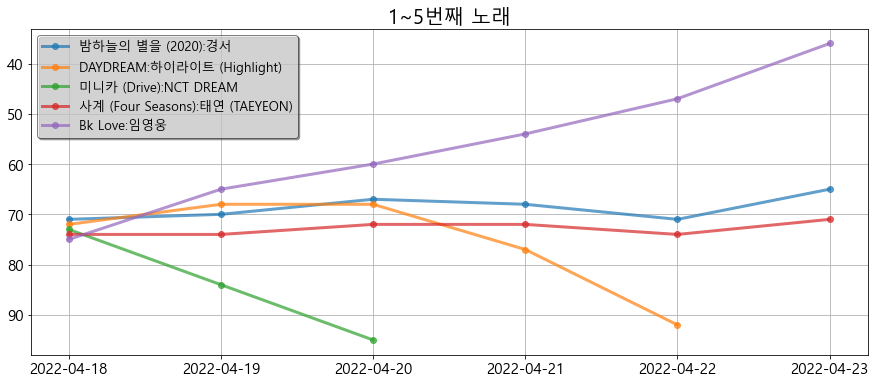

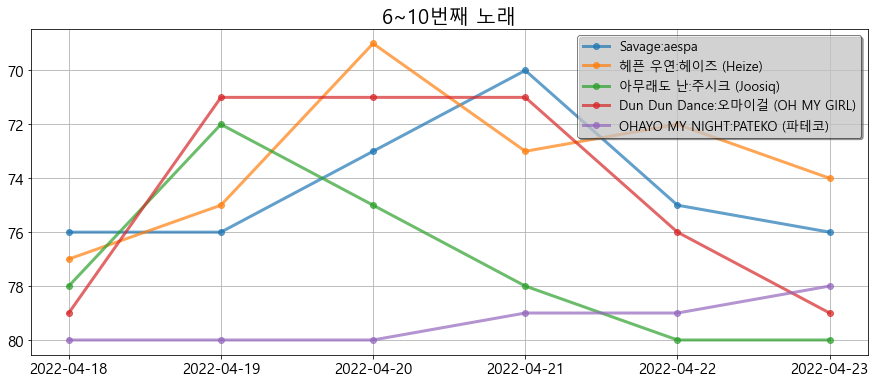

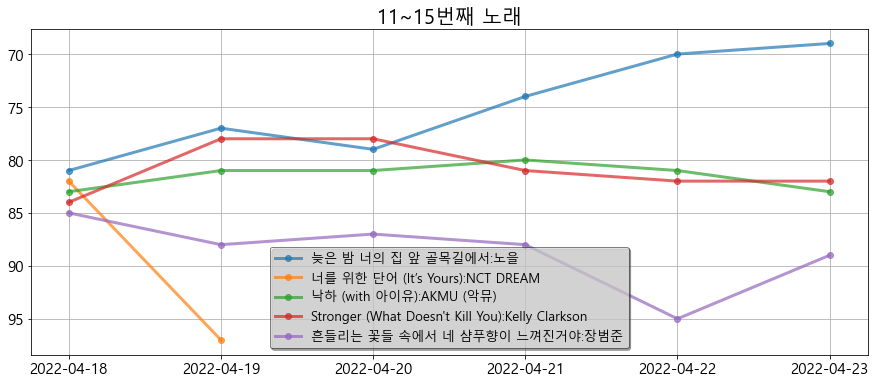

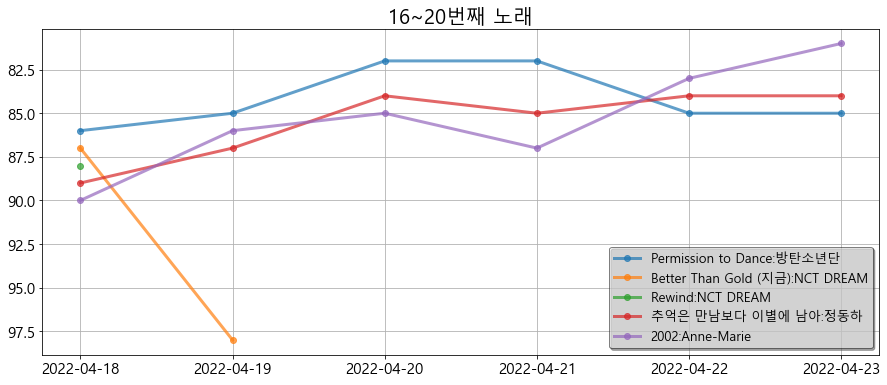

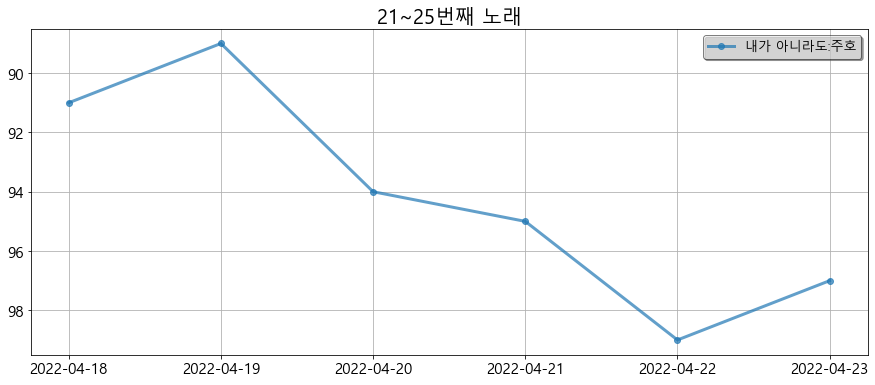

In [486]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(15, 6) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, alpha=0.7, linewidth=3)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, frameon=True, shadow=True, edgecolor='k', fontsize=13)
    plt.show()

## 몇 개씩 묶어서 노래 시각화

### 순위 그래프

In [491]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 8) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

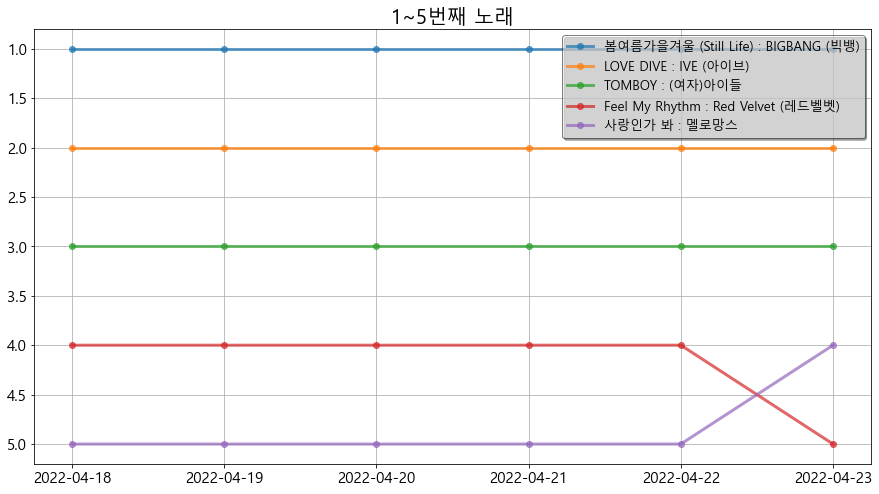

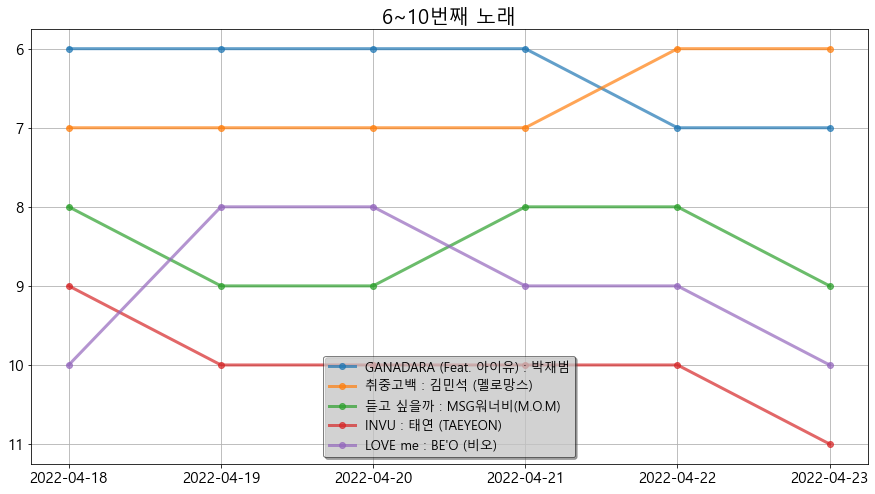

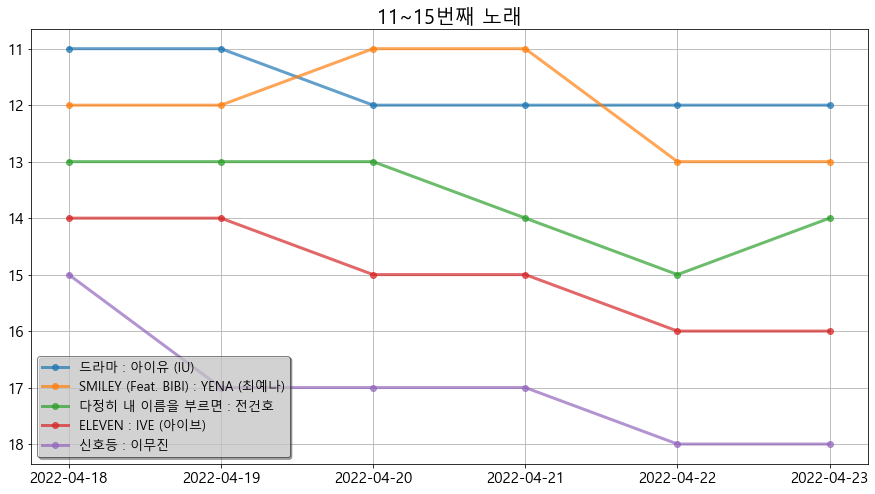

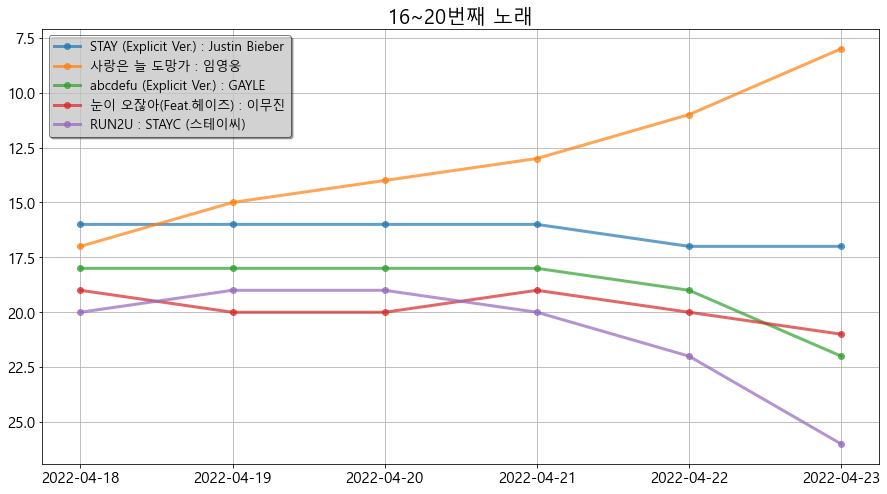

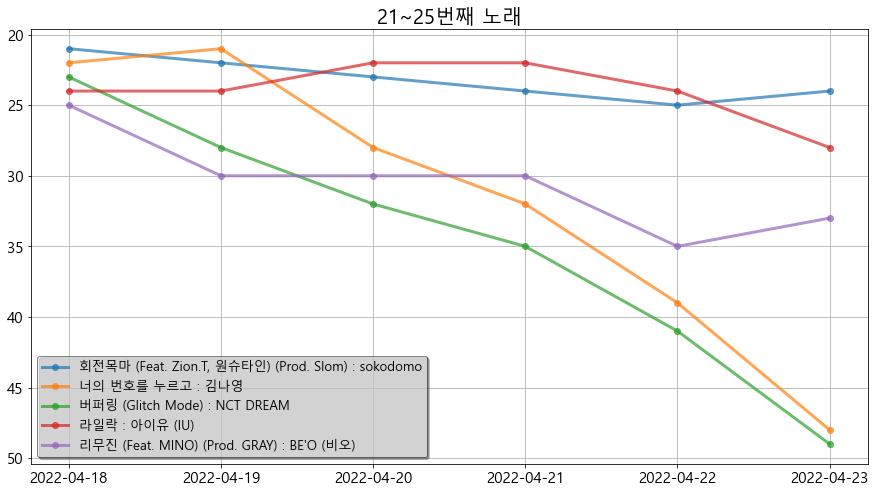

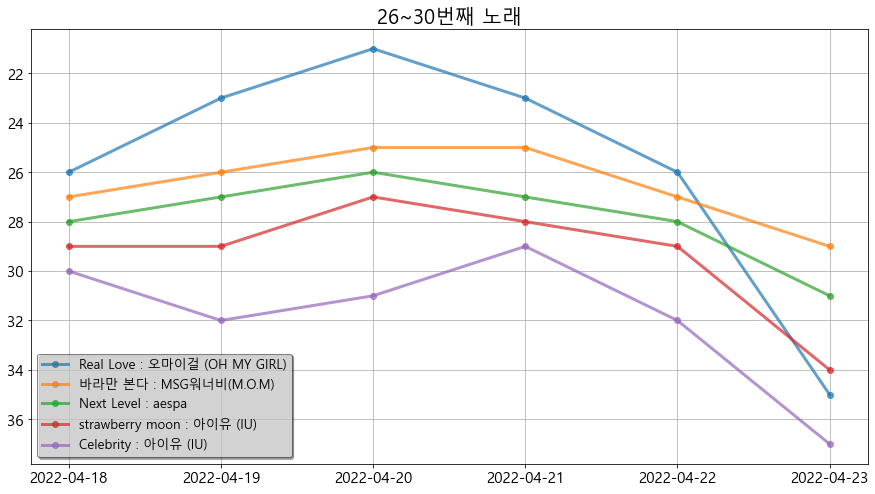

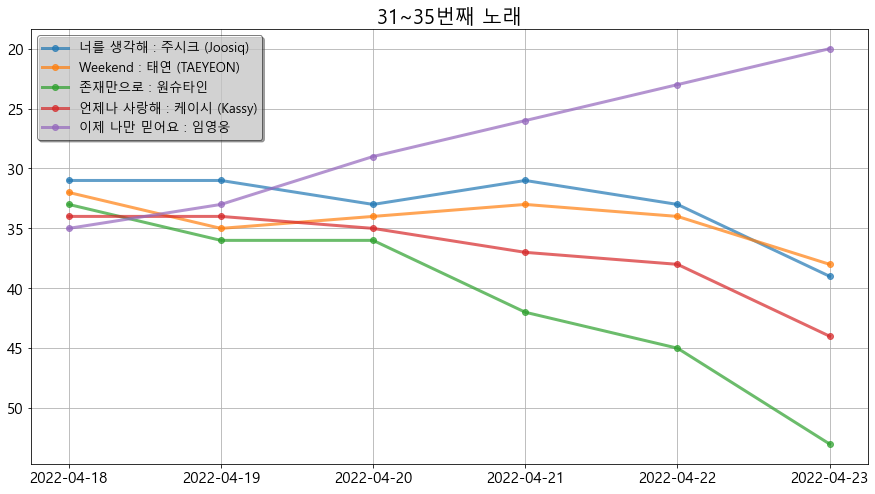

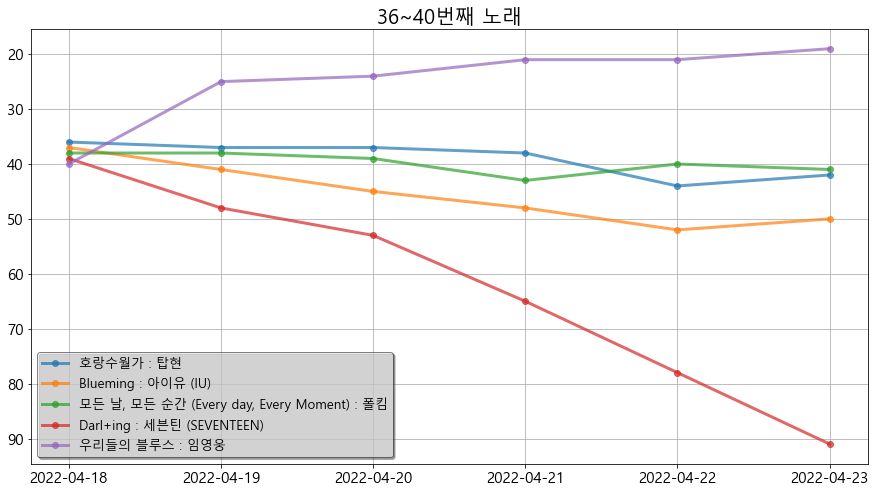

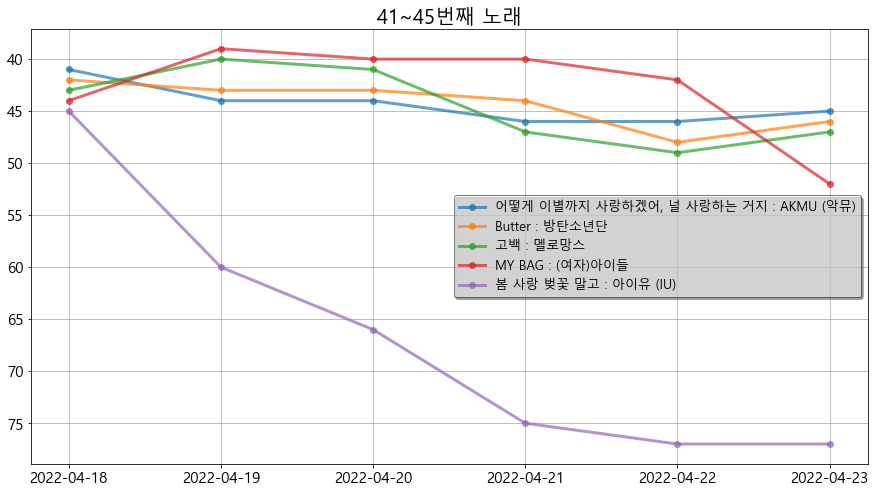

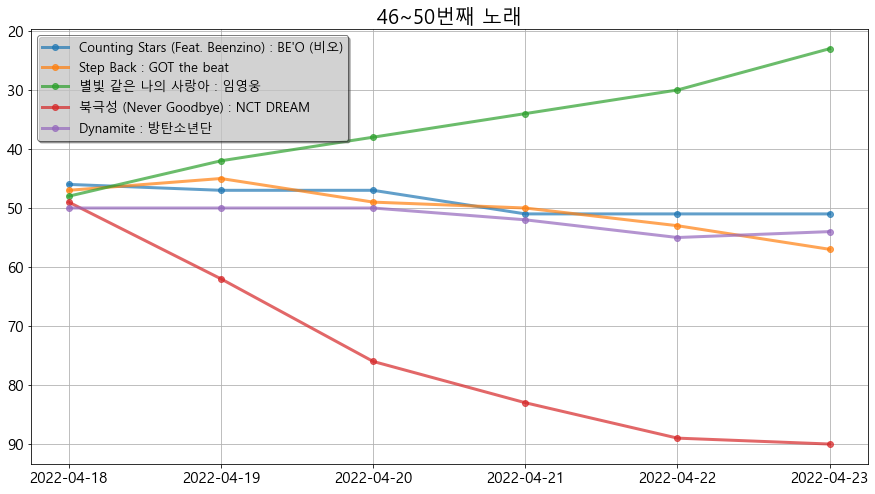

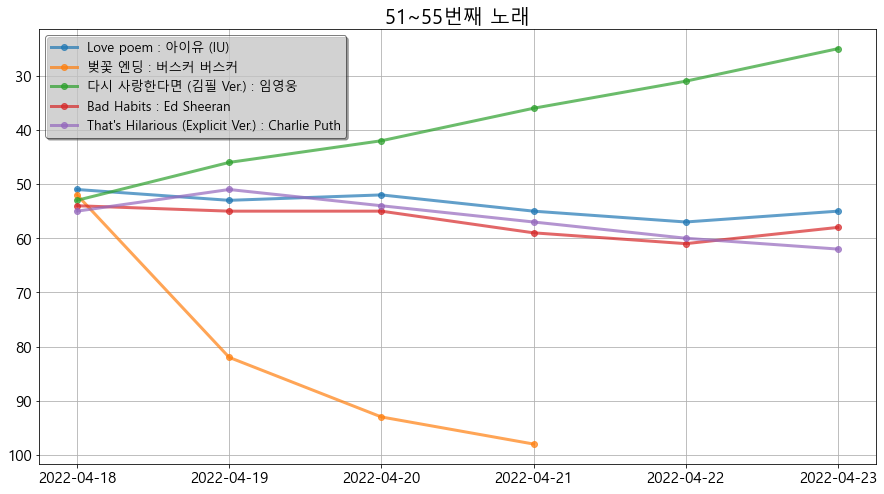

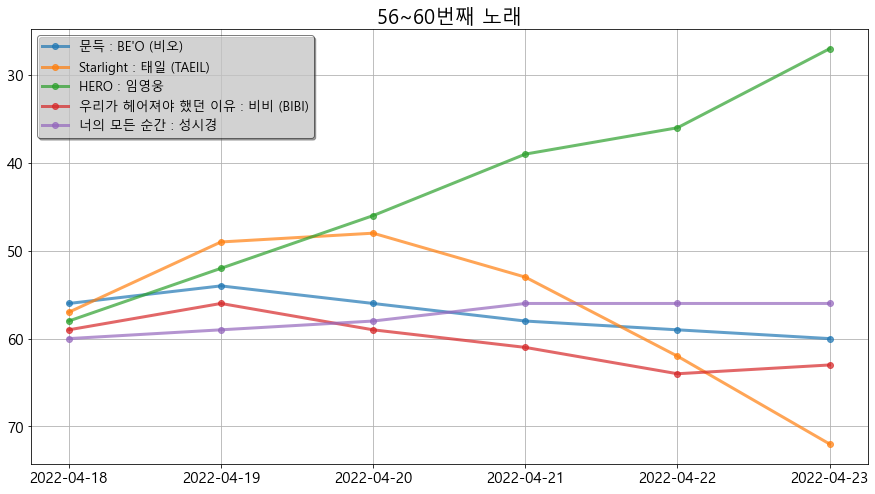

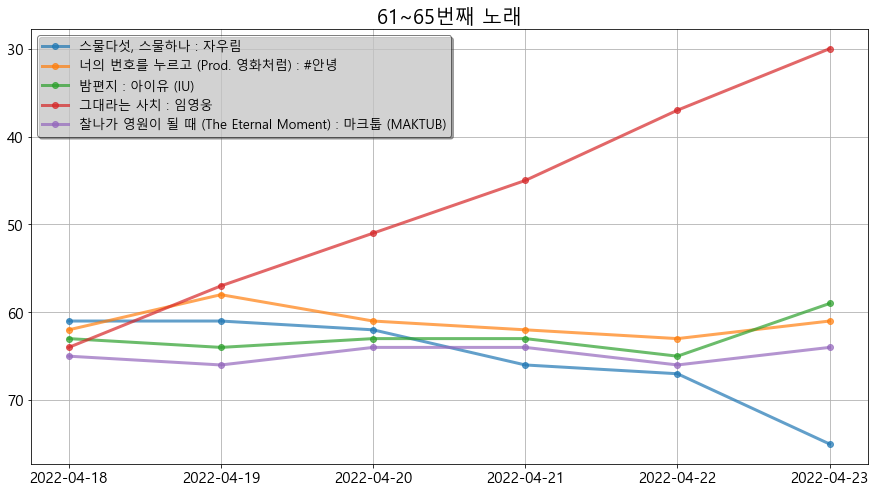

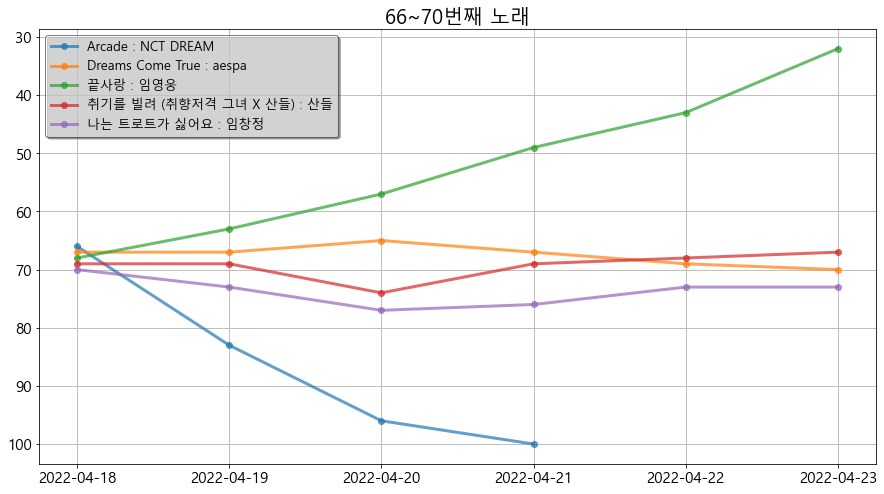

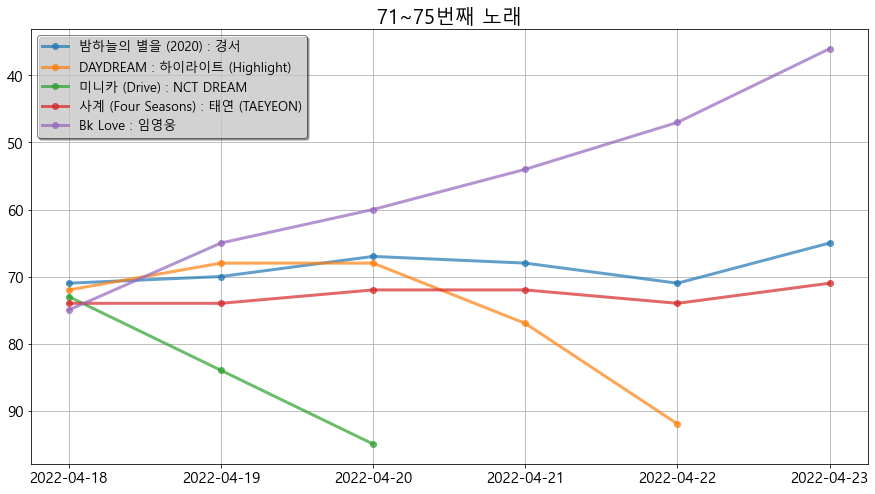

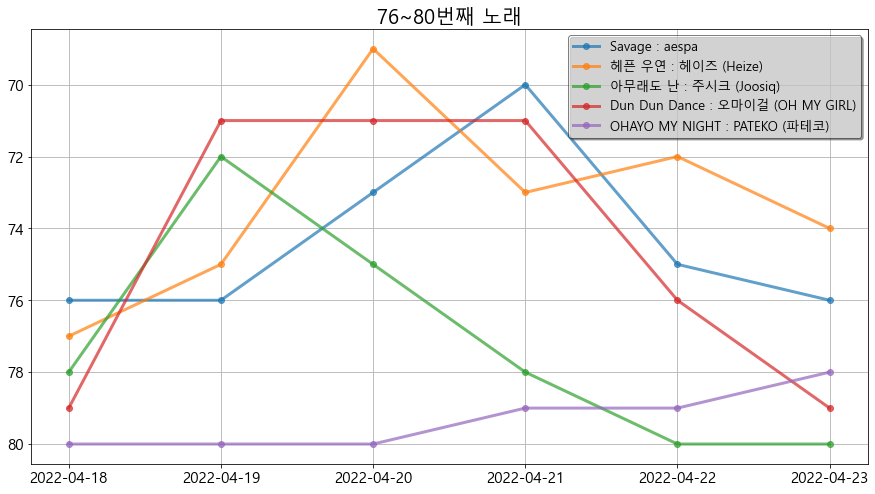

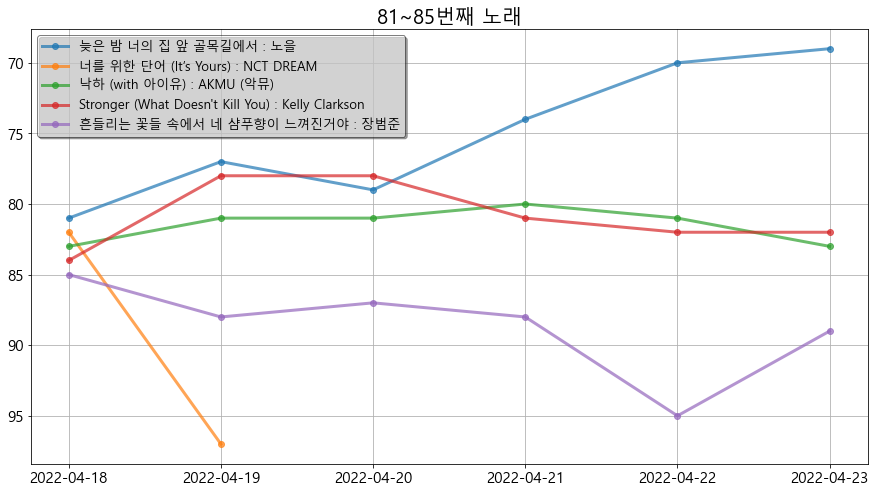

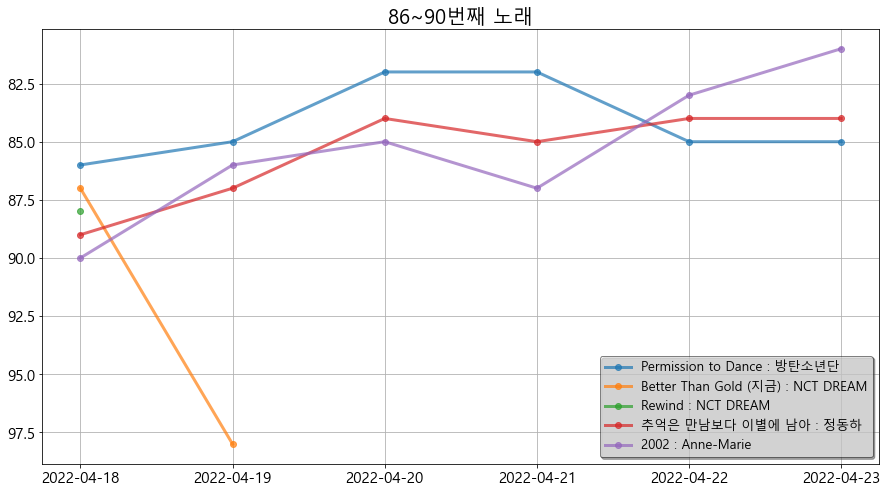

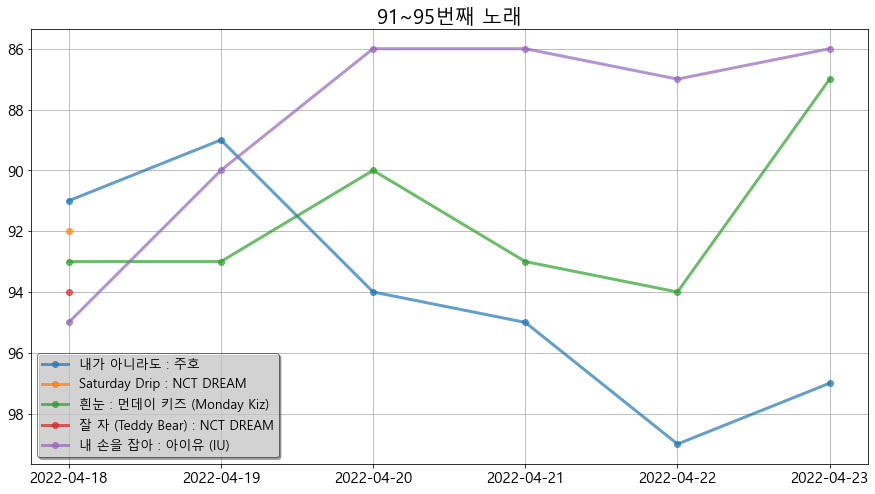

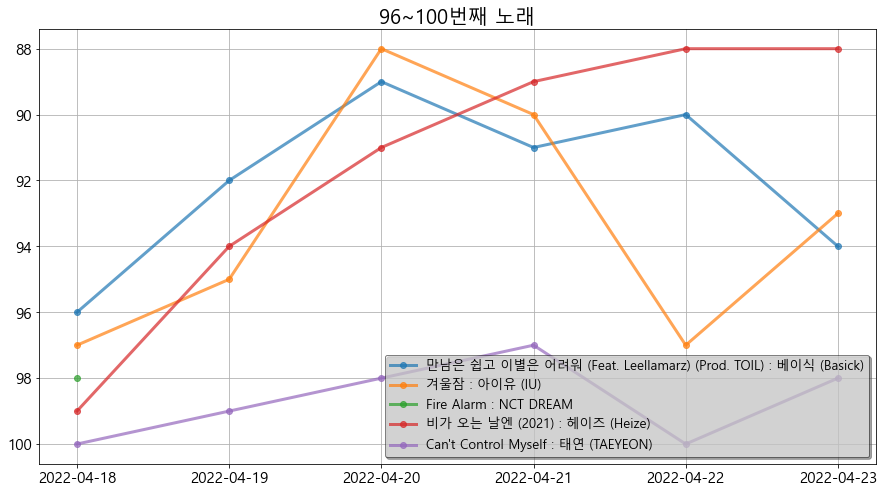

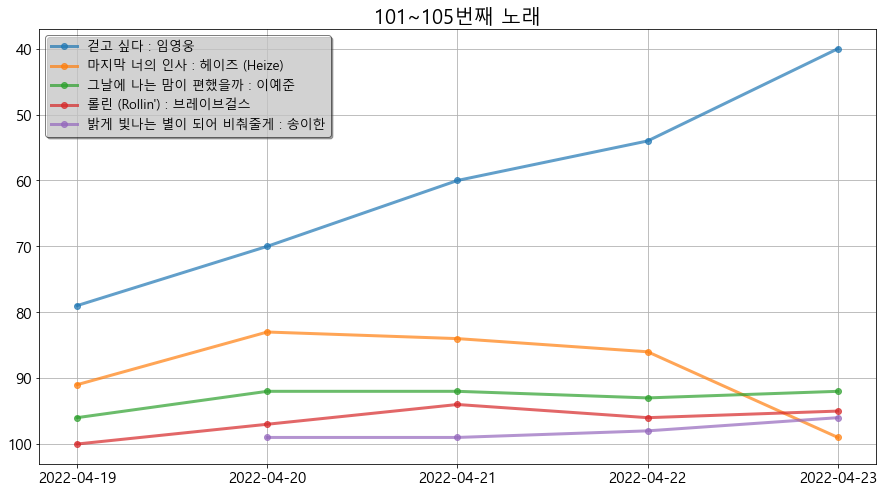

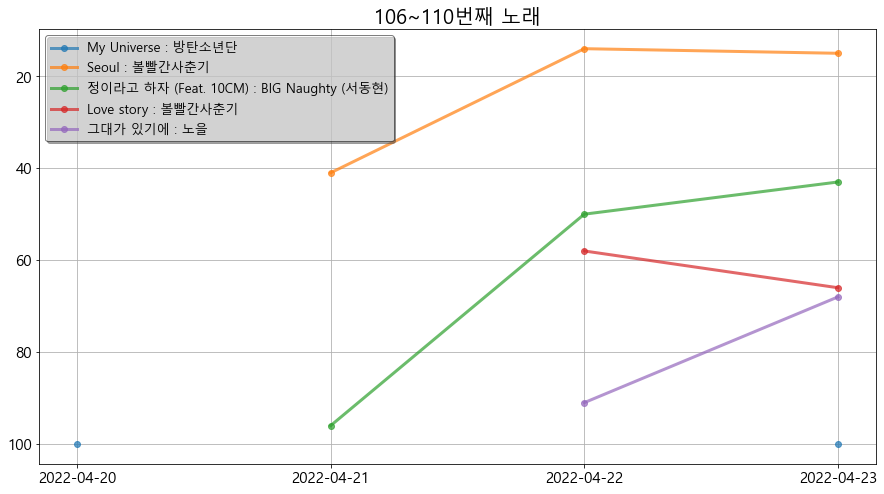

In [492]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [493]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label, alpha=0.7, linewidth=3)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

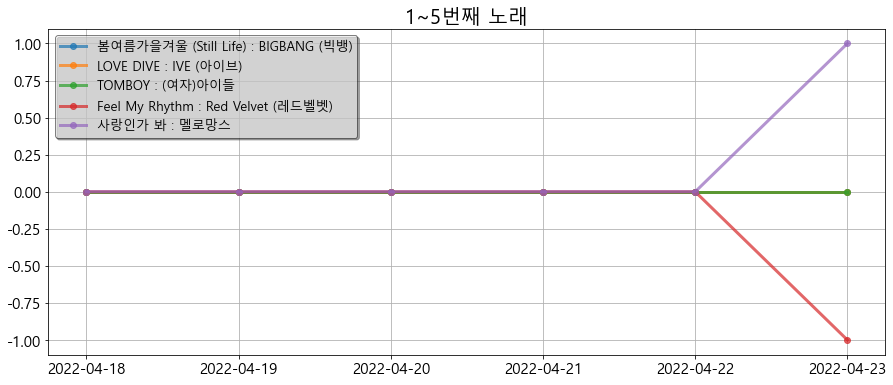

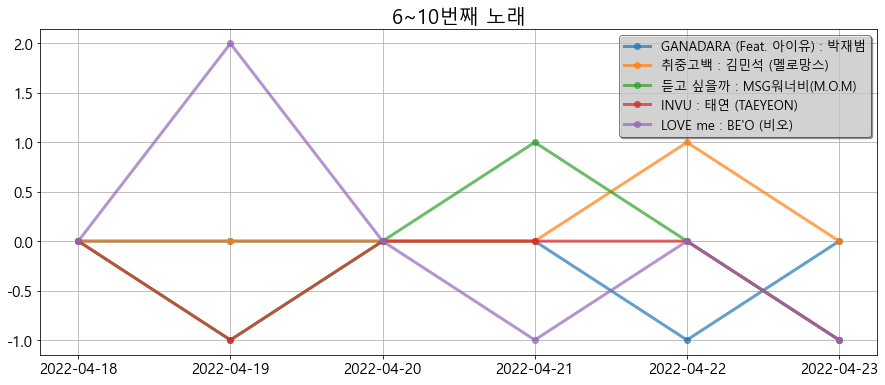

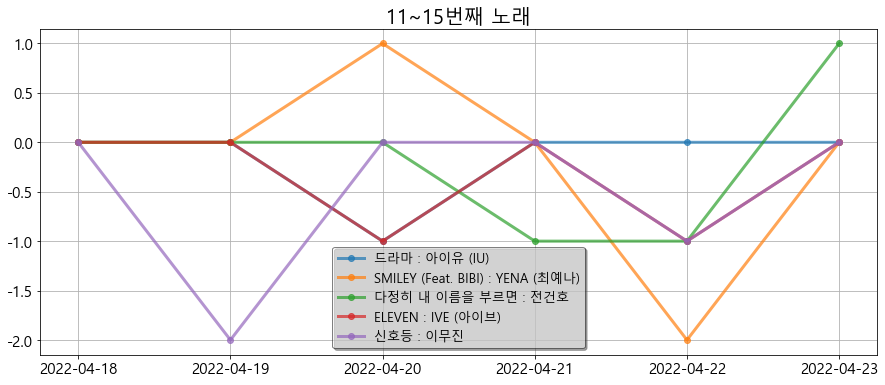

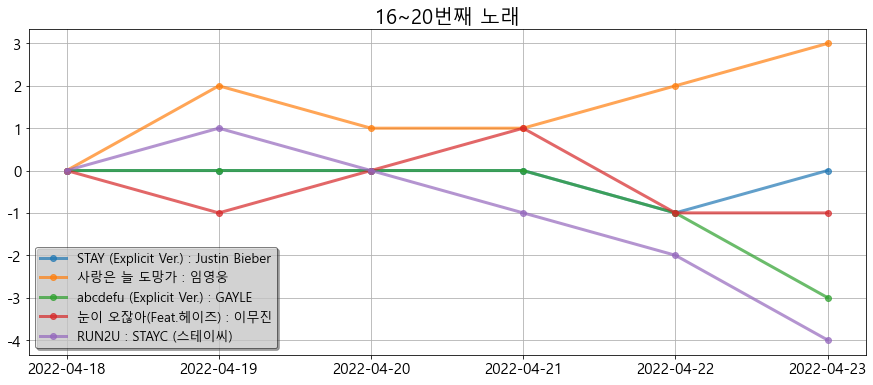

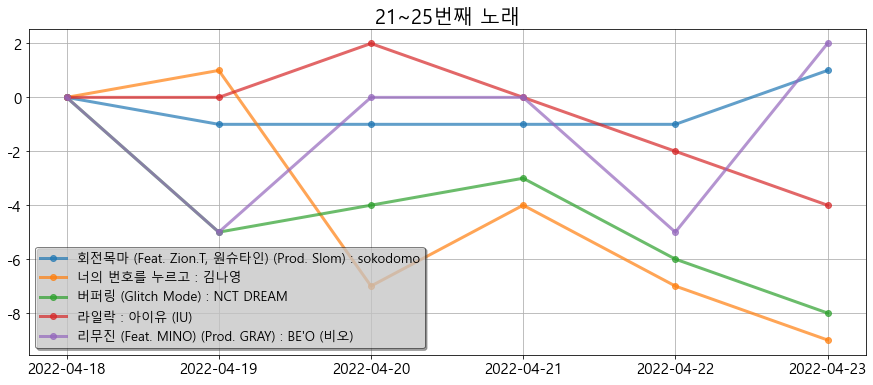

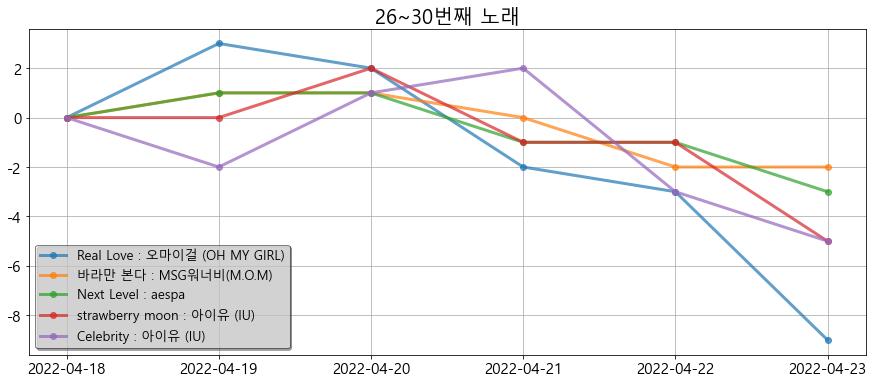

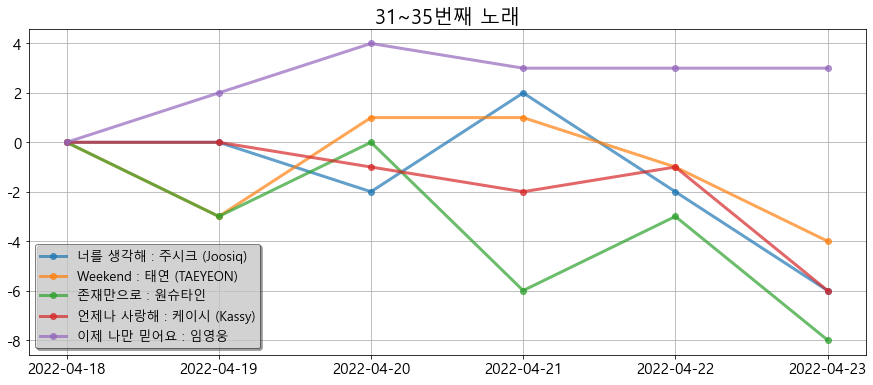

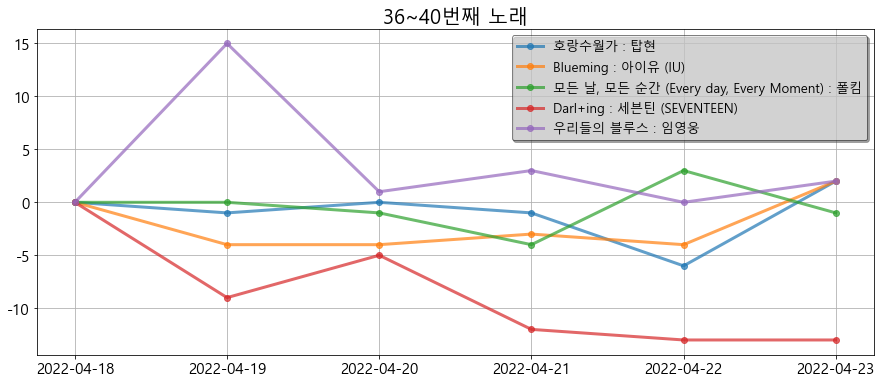

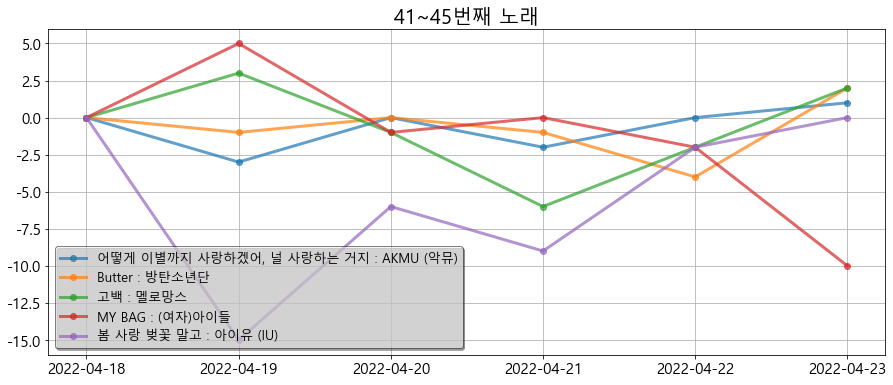

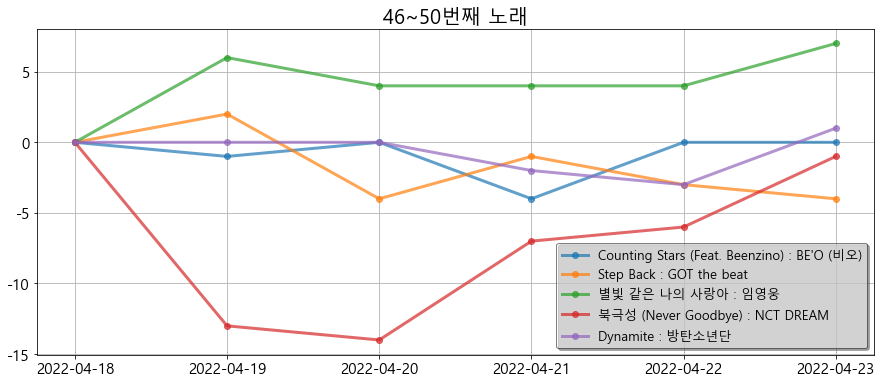

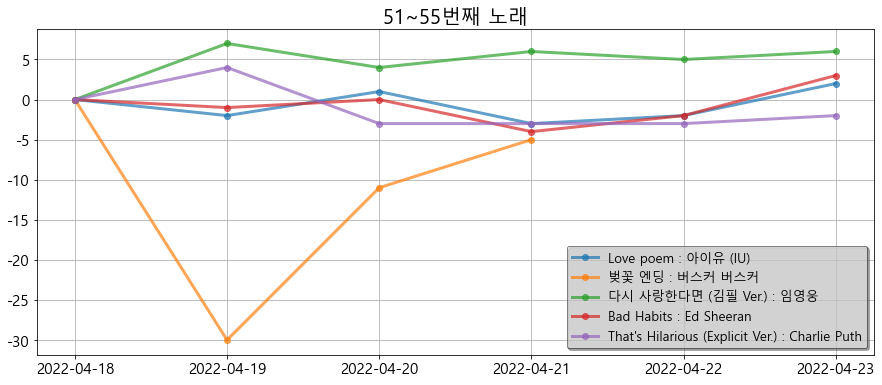

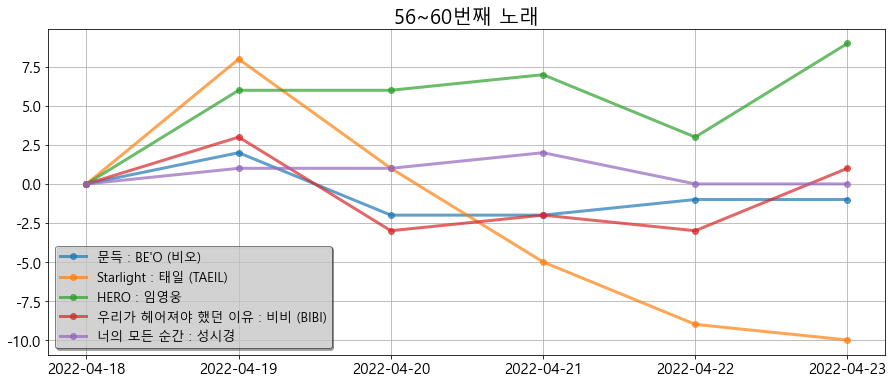

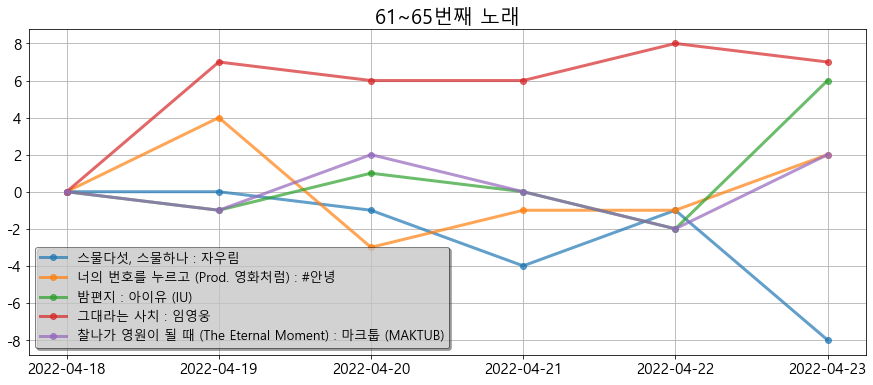

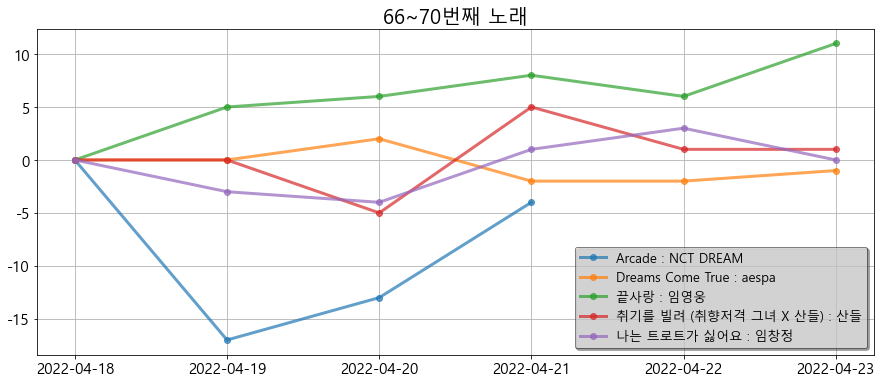

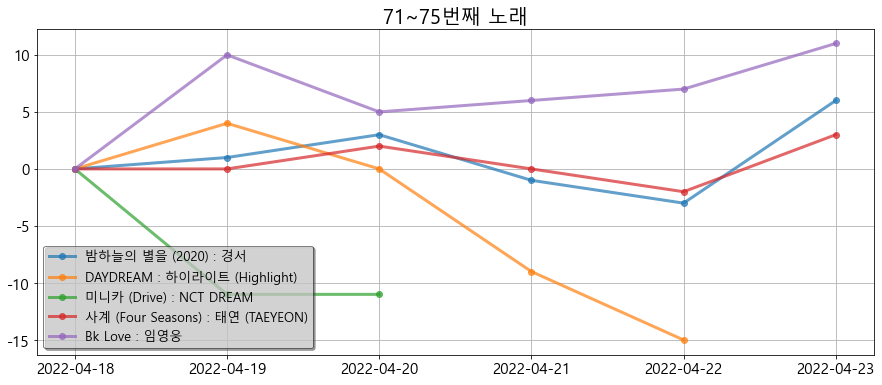

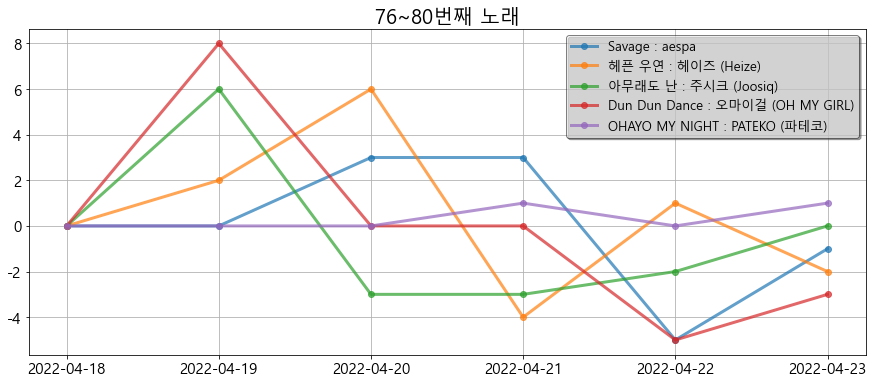

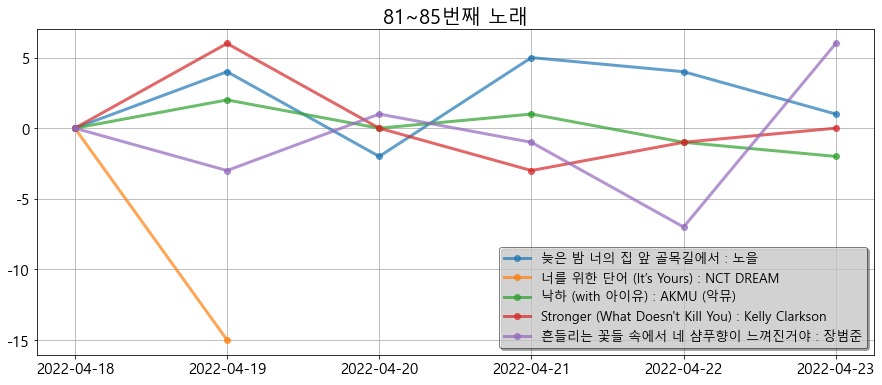

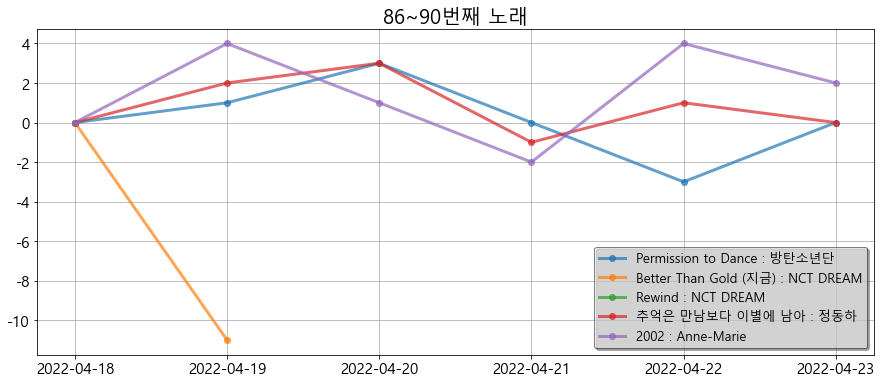

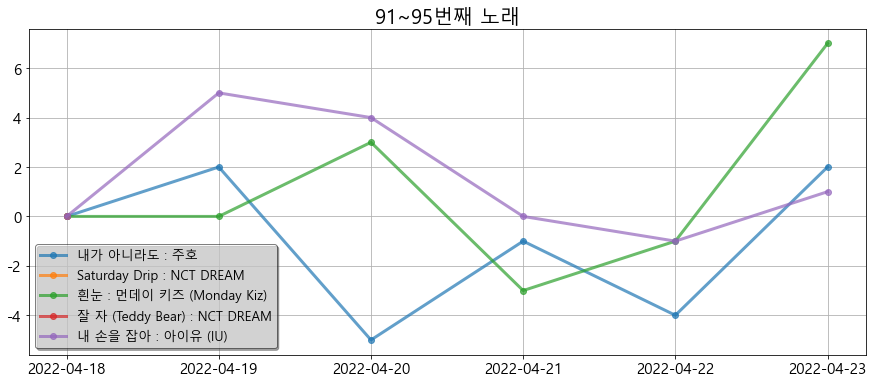

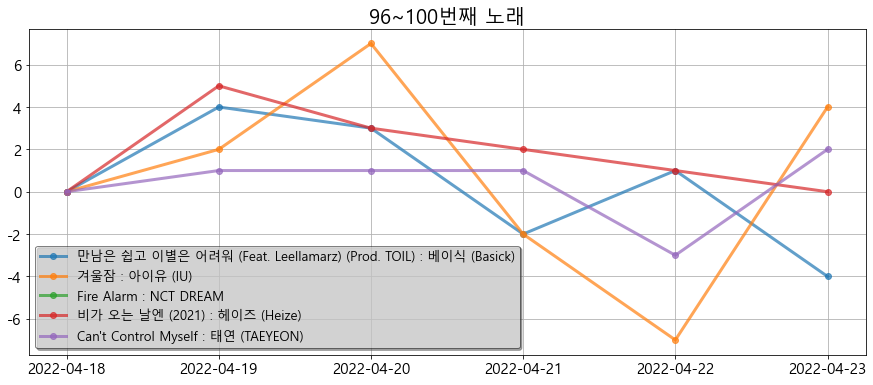

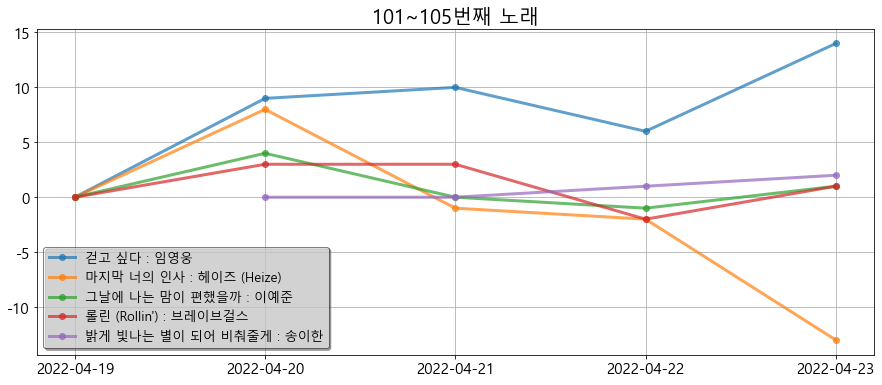

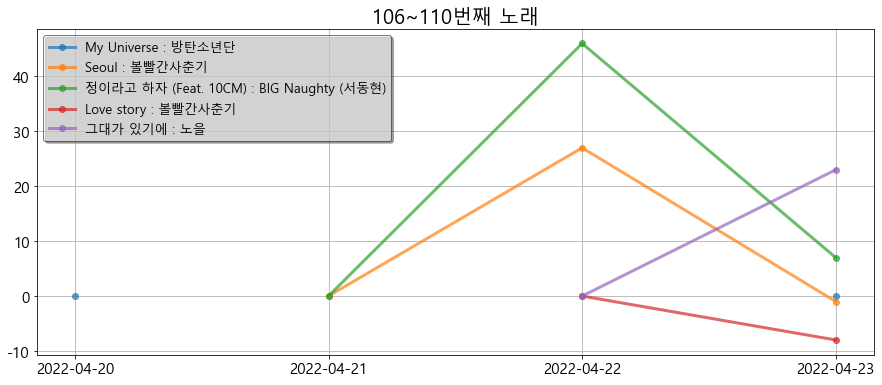

In [494]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

## 급등 음원 추출

### 모든 곡 데이터 병합

In [495]:
total_df = pd.DataFrame()
for one in song_df_list:
    total_df = pd.concat([total_df, one], ignore_index=True)

In [496]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      660 non-null    object 
 1   순위      600 non-null    float64
 2   곡       660 non-null    object 
 3   가수      660 non-null    object 
 4   앨범      660 non-null    object 
 5   순위변동    600 non-null    float64
dtypes: float64(2), object(4)
memory usage: 31.1+ KB


In [497]:
total_df['순위변동'].describe()

count    600.000000
mean      -0.168333
std        4.605288
min      -30.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max       46.000000
Name: 순위변동, dtype: float64

In [498]:
total_df[ total_df['순위변동'] > 0 ]['순위변동'].describe()

count    172.000000
mean       3.953488
std        4.794995
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       46.000000
Name: 순위변동, dtype: float64

In [499]:
Q1 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.25)
Q3 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.75)
IQR = Q3 - Q1
u_outlier = Q3 + 1.5*IQR
print(Q1, Q3, IQR, u_outlier)

1.0 5.0 4.0 11.0


### 이상치 곡 추출

In [500]:
total_df[ total_df['순위변동'] > u_outlier ]

,날짜,순위,곡,가수,앨범,순위변동
235,2022-04-19,25.0,우리들의 블루스,임영웅,IM HERO,15.0
605,2022-04-23,40.0,걷고 싶다,임영웅,사랑의 콜센타 PART39,14.0
640,2022-04-22,14.0,Seoul,볼빨간사춘기,Seoul,27.0
646,2022-04-22,50.0,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),정이라고 하자,46.0
659,2022-04-23,68.0,그대가 있기에,노을,그대가 있기에,23.0


### 급등 음원의 샘플 추출

In [501]:
big_change_music_name_list = total_df[ total_df['순위변동'] > u_outlier ]['곡'].tolist()
big_change_music_name_list

['우리들의 블루스', '걷고 싶다', 'Seoul', '정이라고 하자 (Feat. 10CM)', '그대가 있기에']

In [502]:
temp = total_df[ total_df['곡'] == big_change_music_name_list[2]].reset_index(drop=True)
temp

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-18,NaN,Seoul,볼빨간사춘기,Seoul,NaN
1,2022-04-19,NaN,Seoul,볼빨간사춘기,Seoul,NaN
2,2022-04-20,NaN,Seoul,볼빨간사춘기,Seoul,NaN
3,2022-04-21,41.0,Seoul,볼빨간사춘기,Seoul,0.0
4,2022-04-22,14.0,Seoul,볼빨간사춘기,Seoul,27.0
5,2022-04-23,15.0,Seoul,볼빨간사춘기,Seoul,-1.0


In [503]:
title = temp['곡'].value_counts().index[0]
title

'Seoul'

In [504]:
artist = temp['가수'].value_counts().index[0]
artist

'볼빨간사춘기'

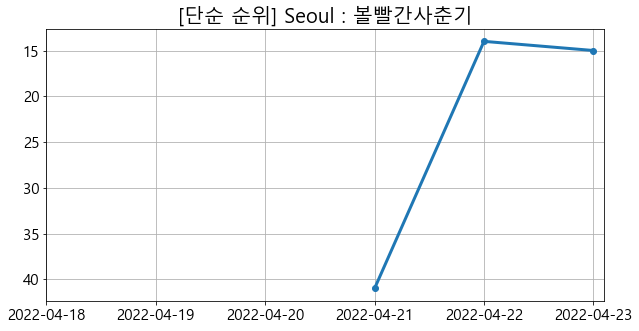

In [505]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.grid(True, zorder=1)
plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, zorder=2)
# plt.bar(temp['날짜'], temp['순위'], zorder=2, edgecolor='r', width=0.3, linestyle='-.', capstyle='round')
graph_title = '[단순 순위] ' + title + ' : ' + artist
plt.title(graph_title, fontdict={'size':20})
plt.xticks(temp['날짜'], fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 이상치 곡의 순위 그래프

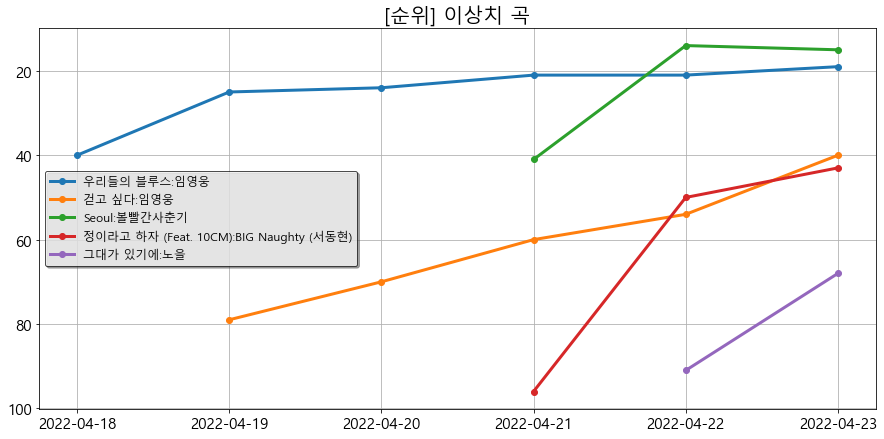

In [506]:
plt.figure(figsize=(15,7))
ax = plt.axes()
ax.invert_yaxis()
plt.grid(True)
for one in big_change_music_name_list:
    temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
    title = temp['곡'].value_counts().index[0]
    artist = temp['가수'].value_counts().index[0]
    song_label = title + ':' + artist
    plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, label=song_label)
    plt.title('[순위] 이상치 곡', fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
plt.show()

### 이상치 곡의 순위변동 그래프

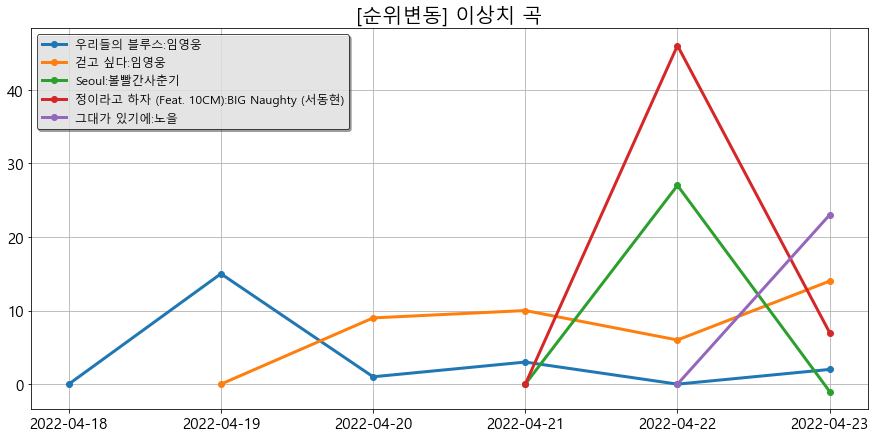

In [507]:
plt.figure(figsize=(15,7))
plt.grid(True)
for one in big_change_music_name_list:
    temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
    title = temp['곡'].value_counts().index[0]
    artist = temp['가수'].value_counts().index[0]
    song_label = title + ':' + artist
    plt.plot(temp['날짜'], temp['순위변동'], '-o', linewidth=3, label=song_label)
    plt.title('[순위변동] 이상치 곡', fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
plt.show()

## 이상치 곡의 구글 트랜드 분석

In [354]:
ca.install(True)
driver = webdriver.Chrome()

## 구글 트렌드 정리

In [472]:
for one in big_change_music_name_list:
    # 구글 트렌트 접속
    url = 'https://trends.google.co.kr/trends/?geo=KR'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()
    # 검색어 입력
    search_box = driver.find_elements_by_css_selector('input')[1]
    search_box.clear()
    search_box.send_keys(one)
    time.sleep(0.5)
    search_box.send_keys(Keys.ENTER)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1.5, 2) )
    
    # csv 파일 다운
    driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/md-content/div/div/div[1]/trends-widget/ng-include/widget/div/div/div/widget-actions/div/button[1]').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    search_artist = total_df[total_df['곡'] == one]['가수'].unique()[0]
    search_title = one.replace(' ', '_')
    today_date = datetime.today().strftime('%Y%m%d_%H%M%S')
    file_oldname = os.path.join('C:/Users/kbjung/Downloads', 'multiTimeline.csv')
    file_newname = os.path.join('C:/Users/kbjung/Downloads', f'[{site_name}]{today_date}_{search_title}_{search_artist}.csv')
    os.rename(file_oldname, file_newname)
    time.sleep(2)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_4956/1653989980.py:9: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  search_box = driver.find_elements_by_css_selector('input')[1]
C:\Users\kbjung\AppData\Local\Temp/ipykernel_4956/1653989980.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/md-content/div/div/div[1]/trends-widget/ng-include/widget/div/div/div/widget-actions/div/button[1]').click()


# 코드 마지막